In [ ]:
# pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import statistics
from datetime import datetime, timedelta
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Step 1: read the data

In [ ]:
top100 = pd.read_csv("Yami_USA_Itemsold_counts_1.1.2022-10.1.2022.csv")
top100.head()

,goods_id,goods_ename,"#xog.market_price, xog.goods_price,\navg(xog.deal_price)",count_item_sold,date,domain,category,subcategory
0,588,"Natural Yeast Bread Hokkaido Creamy Flavor, 80g",1.804744,78,20220301,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
1,588,"Natural Yeast Bread Hokkaido Creamy Flavor, 80g",1.815556,9,20220302,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
2,588,"Natural Yeast Bread Hokkaido Creamy Flavor, 80g",1.660000,1,20220311,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
3,588,"Natural Yeast Bread Hokkaido Creamy Flavor, 80g",1.823906,64,20220419,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
4,588,"Natural Yeast Bread Hokkaido Creamy Flavor, 80g",1.757547,106,20220420,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"


In [ ]:
top100.shape

(19512, 8)

In [ ]:
top100.isnull().values.any()

False

In [ ]:
top100.info()
# top100.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19512 entries, 0 to 19511
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   goods_id                                                 19512 non-null  int64  
 1   goods_ename                                              19512 non-null  object 
 2   #xog.market_price, xog.goods_price,
avg(xog.deal_price)  19512 non-null  float64
 3   count_item_sold                                          19512 non-null  int64  
 4   date                                                     19512 non-null  int64  
 5   domain                                                   19512 non-null  object 
 6   category                                                 19512 non-null  object 
 7   subcategory                                              19512 non-null  object 
dtypes: float64(1), int64(3), ob

In [ ]:
# convert 'goods_id' variable from int to object
top100['goods_id'] = top100['goods_id'].astype(str)

In [ ]:
# convert 'date' variable from int to datetime
top100['date']=pd.to_datetime(top100['date'],format = '%Y%m%d')

### Step 2: Resample
### *Weekly Demand for TOP 1 Product (goods_id = 325781)*

In [ ]:
top1 = top100[top100['goods_id']=='325781']
print('Shape of data', top1.shape)
top1.head()

Shape of data (250, 8)


,goods_id,goods_ename,"#xog.market_price, xog.goods_price,\navg(xog.deal_price)",count_item_sold,date,domain,category,subcategory
15051,325781,Muffin Original Flavor 495g 15pc,9.785399,313,2022-01-01,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
15052,325781,Muffin Original Flavor 495g 15pc,10.584765,170,2022-01-02,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
15053,325781,Muffin Original Flavor 495g 15pc,10.539181,171,2022-01-03,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
15054,325781,Muffin Original Flavor 495g 15pc,10.620952,189,2022-01-04,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"
15055,325781,Muffin Original Flavor 495g 15pc,10.633258,178,2022-01-05,Snack & Beverage,"Cookies, Cakes, Desserts","Cakes, Bread, Pies"


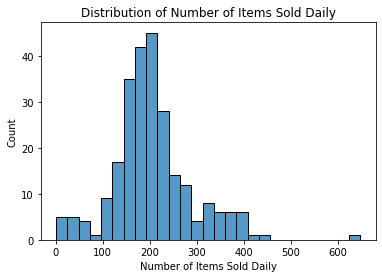

In [ ]:
sns.histplot(x='count_item_sold', data=top1);
plt.xlabel('Number of Items Sold Daily');
plt.title('Distribution of Number of Items Sold Daily');

In [ ]:
# aggregating the daily demand to weekly demand
top1['date'] = pd.to_datetime(top1['date']) - pd.to_timedelta(7, unit='d')
agg_week = top1.groupby([pd.Grouper(key='date', freq='W-SAT')])['count_item_sold'].sum().reset_index().sort_values('date')

In [ ]:
# set date as index
agg_week = agg_week.set_index('date')
type(agg_week.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
print('Shape of data', agg_week.shape)
agg_week

Shape of data (40, 1)


,count_item_sold
date,
2021-12-25,313
2022-01-01,1309
2022-01-08,767
2022-01-15,1154
2022-01-22,1153
2022-01-29,757
2022-02-05,2242
2022-02-12,2195
2022-02-19,2283


In [ ]:
statistics.mean(agg_week['count_item_sold'])

1280.525

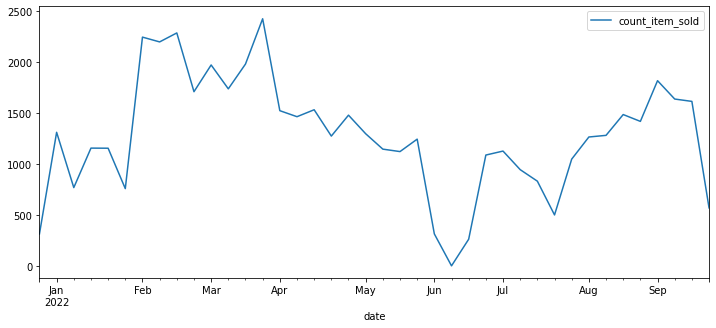

In [ ]:
agg_week.plot(figsize=(12,5))

### Step 3: Stationarity Check

In [ ]:
# one of the ways to check stationarity
# cannot run this since there are only 40 weeks of observations (must have 2 complete cycles: 104 observations)

# decomposition = sm.tsa.seasonal_decompose(agg_week, model='additive')
# fig = decomposition.plot()
# plt.show()

In [ ]:
#Augmented Dickey-Fuller (ADCF) Unit Root Test
# can be used to test for a unit root in a univariate process in the presence of serial correlation
# a test which will turn certain parameters which you can use to judge if the dataset is stationary or not.

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(agg_week['count_item_sold'], autolag='AIC') 
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic (ADF)', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Vlaue (%s)'%key] = value
    print(dfoutput)
    
# Akaike Information Criterion (AIC) measures
# how well a model fits the data it was generated from
# AIC gives you the information about what you watned in time series - the exact value and the actual value
# and analyzes from the difference between them

# Num of Observation Used for ADF Regression and Critical Values Calculation

# Not going in depth, we ran this just to interpret the stationarity

In [ ]:
ad_test(agg_week)

Results of Dickey-Fuller Test:
Test Statistic (ADF)           -3.303846
p-value                         0.014707
#Lags Used                     10.000000
Number of Observations Used    29.000000
Critical Vlaue (1%)            -3.679060
Critical Vlaue (5%)            -2.967882
Critical Vlaue (10%)           -2.623158
dtype: float64


The p-value needs to be as small as possible (less than 0.05). In this case, the dataset is stationary (p-value 0.0147), and we can proceed to the next step.

## Figure out order for ARIMA model

### Step 4: Hyperparameters of ARIMA Model - P d Q

**ARIMA** model is devided into 3 parts
- AR (P): Autoregressive lag (use the previous values to make a future prediction)
- I (d): Integration (differencing)
- MA (Q): Moving average (use the past errors for a future prediction)

If your data is not stationary, meaning if it has increasing or decreasing trend, you need to difference it with the previous value to eliminate that trend.

There are three ways to get ARIMA Hyperparameters
1. method ACF PACF plots (need a lot of knowledge - too complicated)
2. auto_arima
3. for loop

#### 1. Auto_ARIMA

In [ ]:
import pmdarima
from pmdarima import auto_arima

ModuleNotFoundError: ignored

In [ ]:
stepwise_fit = auto_arima(agg_week, trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

# auto_arima is going to try different combinations of demand, and it is going to assign a score (AIC) for every model.
# the goal is to minimize the AIC

# SARIMAX: ARIMA model with seasonality
# ARIMA(1,0,0)(0,0,0) --> (0,0,0) shows there is no seasonality

#### 2. for loop
**!!!!!!Run all of the codes with the Auto_ARIMA order (hyperparameters), and then re-run everything with this for loop hyperparameters again!!!!!!**

In [ ]:
import itertools

In [ ]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [ ]:
pdq_combination=list(itertools.product(p,d,q))

In [ ]:
len(pdq_combination)

128

In [ ]:
rmse=[]
order1=[]

In [ ]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(agg_week)-1))
        error=sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [ ]:
results=pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [ ]:
type(results)

pandas.core.frame.DataFrame

In [ ]:
# results.to_csv('ARIMA_result.csv')
results.sort_values(['RMSE'], ascending=[True])

,RMSE


### Step 5: Split Data into Training and Testing

In [ ]:
print(agg_week.shape)
train=agg_week.iloc[:30]
test=agg_week.iloc[30:]
print(train.shape,test.shape)

(40, 1)
(30, 1) (10, 1)


We are going to build a model based on our training data and predict the test portion of it (then the test portion has the actual data and the predicted data so that we can perform the model evaluation to see how good our model is).

After that, we are going to forecast our unseen future, which is our primary goal based on the entire dataset - and then we will use that model to predict the future demand.

### Step 6: Train the Model (build ARIMA model)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model = (sm.tsa.arima.ARIMA(train, order=(4,0,3))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        count_item_sold   No. Observations:                   30
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -223.763
Date:                Wed, 09 Nov 2022   AIC                            465.525
Time:                        02:25:35   BIC                            478.136
Sample:                    12-25-2021   HQIC                           469.559
                         - 07-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1285.1622    165.619      7.760      0.000     960.555    1609.769
ar.L1         -0.1029      0.172     -0.600      0.549      -0.439       0.233
ar.L2          1.3482      0.153      8.834      0.000       1.049       1.647
ar.L3          0.2987      0.157      1.905      0.057      -0.009       0.606
ar.L4         -0.7141      0.195     -3.669      0.000      -1.096      -0.333
ma.L1          0.9002   8213.918      0.000      1.000   -1.61e+04    1.61e+04
ma.L2         -0.9002   8213.718     -0.000      1.000   -1.61e+04    1.61e+04
ma.L3         -1.0000      0.418     -2.391      0.017      -1.820      -0.180
sigma2      1.428e+05      0.167   8.58e+05      0.000    1.43e+05    1.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.58   Prob(JB):                         0.70
Heteroskedasticity (H):               0.61   Skew:                             0.22
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+26. Standard errors may be unstable.
"""

### Step 7: Make Predictions on Test Set

In [ ]:
pred = model.predict(start=len(train), end=(len(agg_week)-1), typ='levels')
pred
#result.forecast(steps=10)

2022-07-23     829.292453
2022-07-30    1228.994145
2022-08-06    1134.599257
2022-08-13    1413.752806
2022-08-20    1377.680153
2022-08-27    1444.145817
2022-09-03    1539.470963
2022-09-10    1409.167322
2022-09-17    1596.706420
2022-09-24    1382.750203
Freq: W-SAT, Name: predicted_mean, dtype: float64

In [ ]:
len(train), len(agg_week)-1

(30, 39)

### Step 8: Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

- std: measures the spread of data around the mean
- rmse: measures the distance between some values and prediction for those values (the error of prediction)

RMSE (Root Mean Squared Error): the standard deviation of the residuals (prediction errors)
the square root of the average of squared differences between prediction and actual observation
How far our predicted value is from the true value

The lower the RMSE, the better a given model is able to “fit” a dataset

In [ ]:
error=sqrt(mean_squared_error(test,pred))
error

313.0619626449551

In [ ]:
test.mean(), np.sqrt(test.var()) #std of the test dataset

(count_item_sold    1261.6
 dtype: float64, count_item_sold    441.052327
 dtype: float64)

When RMSE is lesser than the standard deviation -> This means that the regression model is better than the null model.

In [ ]:
# train

In [ ]:
# test

In [ ]:
# pred

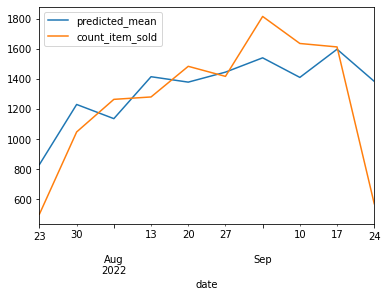

In [ ]:
pred.plot(legend=True)
test['count_item_sold'].plot(legend=True)

In [ ]:
# train.plot(legend=True, label='Train', figsize=(12,5))
# test.plot(legend=True, label='Test')
# pred.plot(legend=True, label='predictionARIMA')

### Step 9: Predict Future Data (rebuild the model based on the entire dataset)

In [ ]:
final_model = (sm.tsa.arima.ARIMA(agg_week, order=(4,0,3))).fit()

In [ ]:
# print the last five values from my dataset to see what date my dataset ends
# agg_week.tail()

In [ ]:
# prediction for the future 3 months
prediction=final_model.predict(len(agg_week),len(agg_week)+12, typ='levels').rename('ARIMA Predictions')

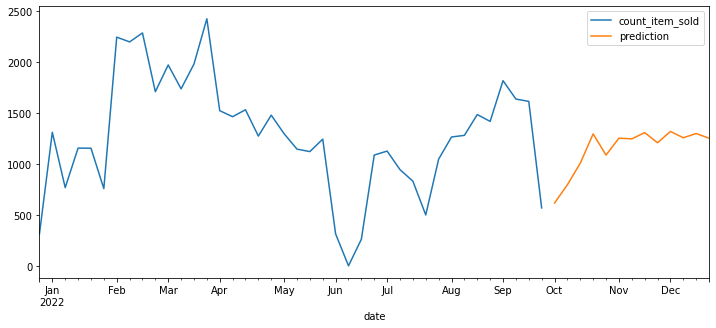

In [ ]:
agg_week.plot(legend=True, figsize=(12,5))
prediction.plot(legend=True, label='prediction')

# prediction.plot()

In [ ]:
prediction

2022-10-01     615.483589
2022-10-08     794.781606
2022-10-15    1006.740924
2022-10-22    1293.158054
2022-10-29    1085.639141
2022-11-05    1251.199675
2022-11-12    1244.654208
2022-11-19    1305.753950
2022-11-26    1206.368410
2022-12-03    1317.423498
2022-12-10    1255.639022
2022-12-17    1297.092717
2022-12-24    1250.971604
Freq: W-SAT, Name: ARIMA Predictions, dtype: float64